In [7]:
import pandas as pd
import networkx as nx

import csv

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("../../data/github-organizations.csv")

In [9]:
df.head(5)

,Organisation,member
0,ethereum,Oleh Aldekein
1,ethereum,NaN
2,ethereum,Frank Szendzielarz
3,ethereum,Kolby Moroz Liebl
4,ethereum,Marius van der Wijden


In [10]:
# Graph creation and sampling
sample_size = 75
G_sampled = nx.from_pandas_edgelist(df.sample(sample_size, random_state=51), source="Organisation", target="member")

# Visualisations

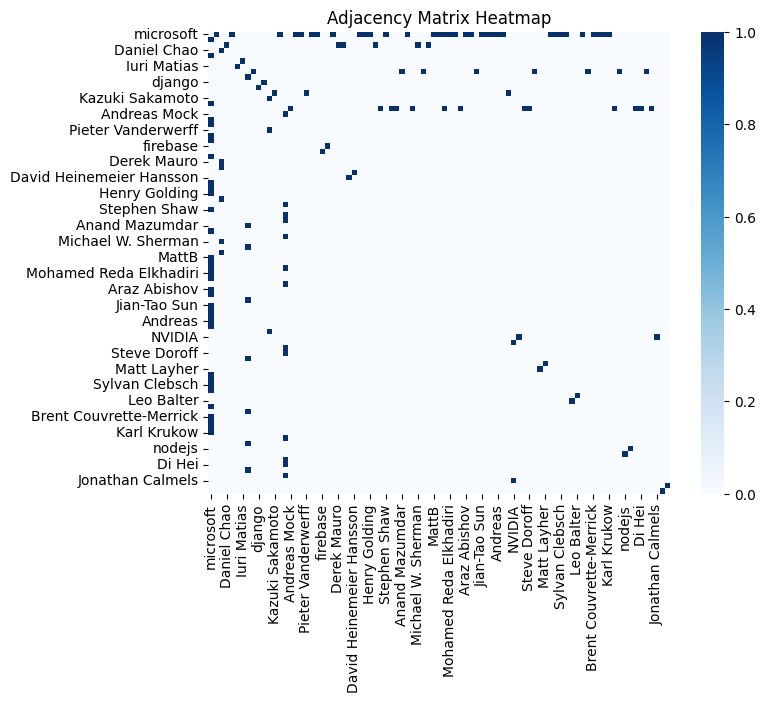

In [11]:
A = nx.adjacency_matrix(G_sampled) 
nodes = list(G_sampled.nodes())
adj_df = pd.DataFrame(A.toarray(), index=nodes, columns=nodes)

plt.figure(figsize=(8, 6))
sns.heatmap(adj_df, cmap="Blues", annot=False, square=True, cbar=True)
plt.title("Adjacency Matrix Heatmap")
plt.show()

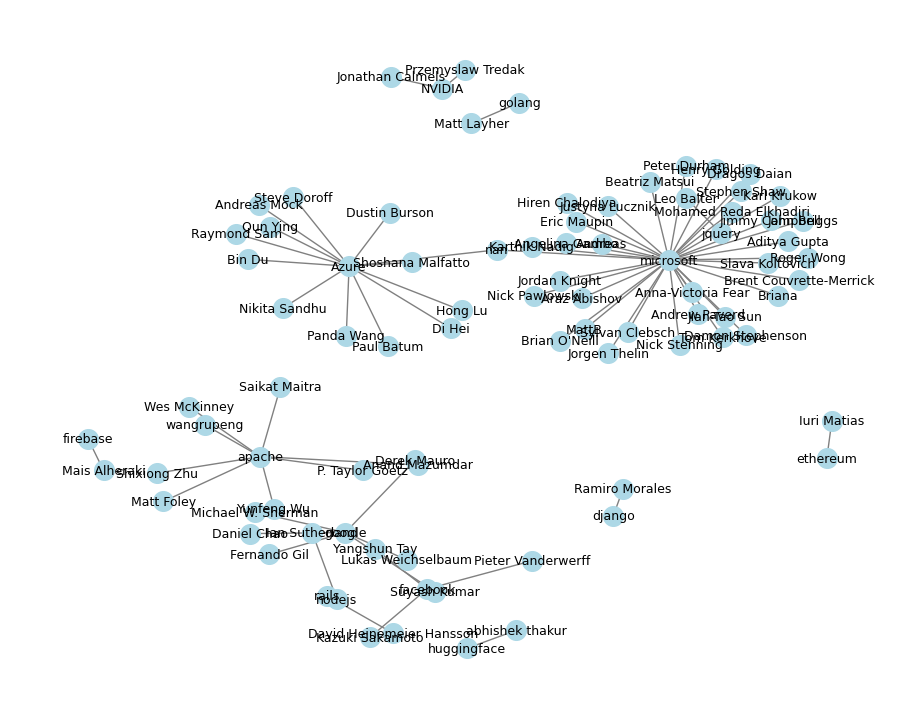

In [12]:
# Graph plot
pos_spring = nx.spring_layout(G_sampled, k=0.3, iterations=50, seed=11)

plt.figure(figsize=(9, 7))
nx.draw(G_sampled, pos_spring, with_labels=True, node_color="lightblue", node_size=200, font_size=9, edge_color="gray")
plt.show()

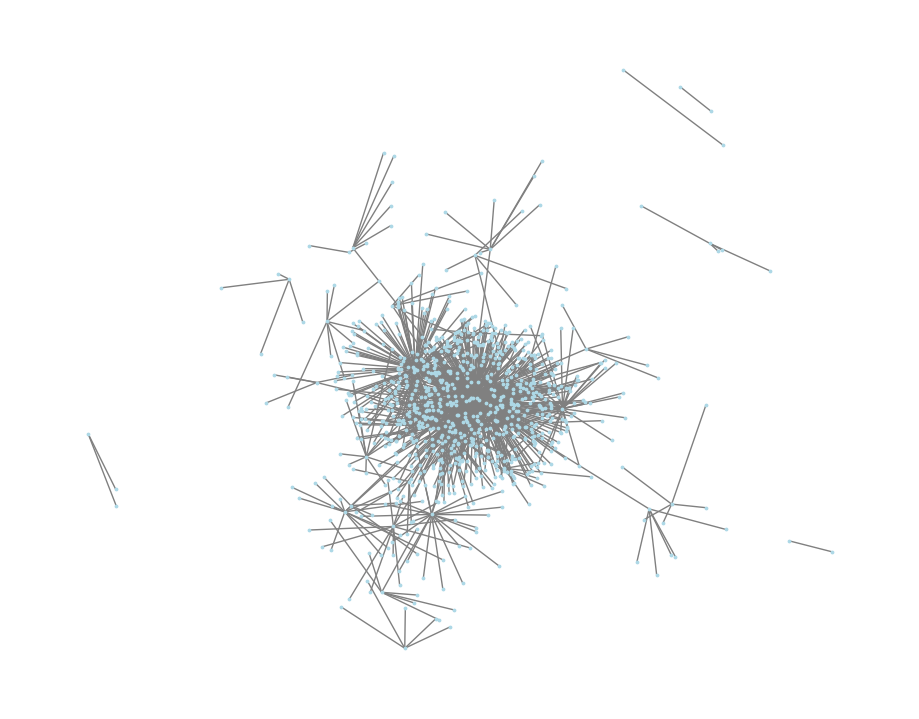

In [ ]:
# Graph creation and sampling
sample_size = 1000
G_sampled = nx.from_pandas_edgelist(df.sample(sample_size, random_state=1), source="Organisation", target="member")

# Graph plot
pos_spring = nx.spring_layout(G_sampled, k=0.3, iterations=30, seed=1)

plt.figure(figsize=(9, 7))
nx.draw(G_sampled, pos_spring, with_labels=False, node_color="lightblue", node_size=3, font_size=7, edge_color="gray")
plt.show()

# Network/node parameter calculation

In [ ]:
# Graph creation without sampling
G = nx.from_pandas_edgelist(df, source="Organisation", target="member")

##---NODE PARAMETERS---
# Degrees
print(f"Degrees: {len(G.degree)}")
degrees = dict(G.degree())

df_degrees = pd.DataFrame(list(degrees.items()), columns=["Node", "Degree"])
df_degrees.to_csv("../../data/output/node_degrees.csv", index=False)

# Distance
distances = dict(nx.all_pairs_shortest_path_length(G_sampled))
min_distance = min(d for distances in distances.values() for d in distances.values() if d > 0)
print("Distance:", min_distance)

# Closeness
closeness = nx.closeness_centrality(G)
print(f"Closeness: {closeness}")
df_closeness = pd.DataFrame(list(closeness.items()), columns=["Node", "Degree"])
df_closeness.to_csv("../../data/output/node_closeness.csv", index=False)

# Betweenness
betweenness = nx.betweenness_centrality(G)
print(f"Betweenness: {betweenness}")
df_betweenness = pd.DataFrame(list(betweenness.items()), columns=["Node", "Degree"])
df_betweenness.to_csv("../../data/output/node_betweenness.csv", index=False)

# Clustering coeficients
clustering = nx.clustering(G)
print(f"Clustering {clustering}")
df_clustering = pd.DataFrame(list(clustering.items()), columns=["Node", "Degree"])
df_clustering.to_csv("../../data/output/node_clustering.csv", index=False)



Degrees: 8920
Minimum non-zero shortest path length: 1
Closeness: {'ethereum': 0.3258929067749012, 'Oleh Aldekein': 0.24546481900500947, nan: 0.48085414012444944, 'Frank Szendzielarz': 0.24546481900500947, 'Kolby Moroz Liebl': 0.24546481900500947, 'Marius van der Wijden': 0.24546481900500947, 'Mihai Alisie': 0.24546481900500947, 'Anton Nashatyrev': 0.24546481900500947, 'Justin Martin': 0.24546481900500947, 'RJ Catalano': 0.24546481900500947, 'Yoshitomo Nakanishi': 0.24546481900500947, 'Alexander Arlt': 0.24546481900500947, 'Alessandro Coglio': 0.24546481900500947, 'acud': 0.24546481900500947, 'Patricio Palladino': 0.24546481900500947, 'Angela Lu': 0.24546481900500947, 'Alex Beregszaszi': 0.24546481900500947, 'becca': 0.24546481900500947, 'Kamil Śliwak': 0.24546481900500947, 'Cesar Brazon': 0.24546481900500947, 'Christian Parpart': 0.24546481900500947, 'Corwin Smith': 0.24546481900500947, 'Marian OANCΞA': 0.24546481900500947, 'Darko Macesic': 0.24546481900500947, 'Daniel Kirchner': 0.24

In [15]:
##---NETWORK PARAMETERS---
print("\n\n")
#Diameter
dameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print(f"Diameter: {dameter}")

# Centralization Scores


# Cliques
cliques = list(nx.find_cliques(G))
print(f"Number of cliques: {len(cliques)}")
#print(cliques)

# Clustering coeficients
avg_clustering = nx.average_clustering(G)
print(f"Averaga Clustering {avg_clustering}")

# Modularity
modularity = nx.modularity_matrix(G)
print(f"Modularity: \n{modularity}")




Diameter: 8
Number of cliques: 9656
Averaga Clustering 0.0
Modularity: 
[[-2.83554267e-01  9.96168186e-01  8.96541011e-01 ... -3.83181442e-03
  -3.83181442e-03 -3.83181442e-03]
 [ 9.96168186e-01 -5.17812759e-05 -1.39809445e-03 ... -5.17812759e-05
  -5.17812759e-05 -5.17812759e-05]
 [ 8.96541011e-01 -1.39809445e-03 -3.77485501e-02 ... -1.39809445e-03
  -1.39809445e-03 -1.39809445e-03]
 ...
 [-3.83181442e-03 -5.17812759e-05 -1.39809445e-03 ... -5.17812759e-05
  -5.17812759e-05 -5.17812759e-05]
 [-3.83181442e-03 -5.17812759e-05 -1.39809445e-03 ... -5.17812759e-05
  -5.17812759e-05 -5.17812759e-05]
 [-3.83181442e-03 -5.17812759e-05 -1.39809445e-03 ... -5.17812759e-05
  -5.17812759e-05 -5.17812759e-05]]
